In [1]:
import pandas as pd

In [2]:
print(pd.__version__)

0.25.1


In [3]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data


auto_data = pd.read_csv('auto-mpg.data',
                       delim_whitespace = True, header=None,
                       names=['mpg',
                              'cylinders',
                              'displacement',
                              'horsepower',
                              'weight',
                              'acceleration',
                              'model',
                              'origin',
                              'car_name'
                       ])


In [4]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [6]:
len(auto_data['car_name'].unique())

305

In [7]:
len(auto_data)

398

In [8]:
auto_data = auto_data.drop('car_name', axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [21]:
auto_data['origin']=auto_data['origin'].replace({1:'america', 2:'europe', 3:'asia'})
auto_data.head()


auto_data=pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [22]:
import numpy as np
auto_data = auto_data.replace('?', np.nan)

In [23]:
auto_data = auto_data.dropna()
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.00,2130.0,24.6,82,0,0,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,0,0


In [24]:
from sklearn.model_selection import train_test_split

X=auto_data.drop('mpg', axis=1)

#Taking the labels[mpg]
Y=auto_data['mpg'] 

#Spliting into 80% for training set and 20% for testing set so we can see out accuracy

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
from  sklearn.svm import SVR
regression_model = SVR(kernel='linear',C=0.5)
regression_model.fit(X_train,Y_train)


SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
regression_model.coef_

array([[-0.91314346,  0.02268979,  0.01915072, -0.00724669,  0.21985595,
         0.91803899, -1.6119645 ,  0.40460805,  1.20735645]])

In [38]:
regression_model.score(X_train, Y_train)

0.8087716316091305

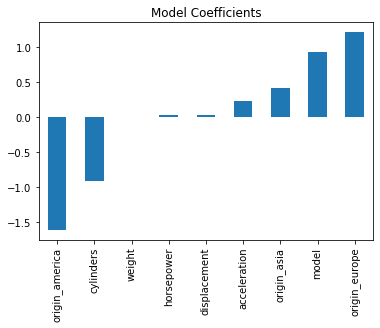

In [40]:
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

predictors = X_train.columns
coef=Series(regression_model.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [42]:
y_predict = regression_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


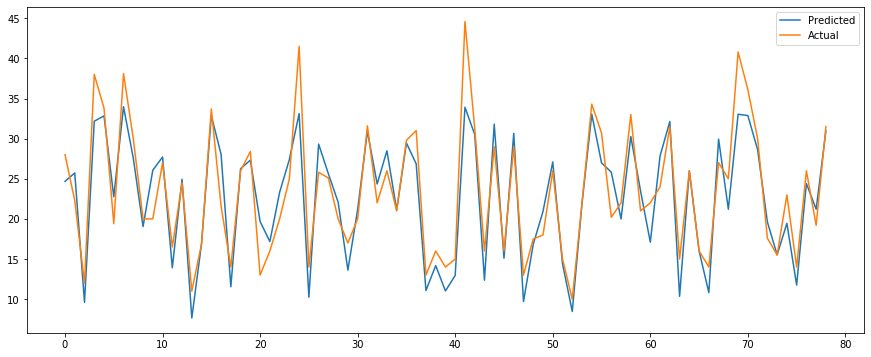

In [43]:
%pylab inline
pylab.rcParams['figure.figsize']=(15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.legend()
plt.show()

In [44]:
regression_model.score(x_test, y_test)

0.8262845397302738

In [45]:
from sklearn.metrics import mean_squared_error

regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

10.797339127966195

In [46]:
import math

math.sqrt(regression_model_mse)

3.285930481304526